# Guide to Setting Up Virtual Environments with Conda
-- by Manu Gupta

## 1. Using Terminal (Mac/Linux) or Anaconda Prompt (for Windows)

**It's best if you do it all in terminal or Anaconda Prompt** (create environment and install libraries) and select your environment instead of "base (root)" in Anaconda Navigator GUI (indicated by arrow below) and then start the Jupyter Notebook.

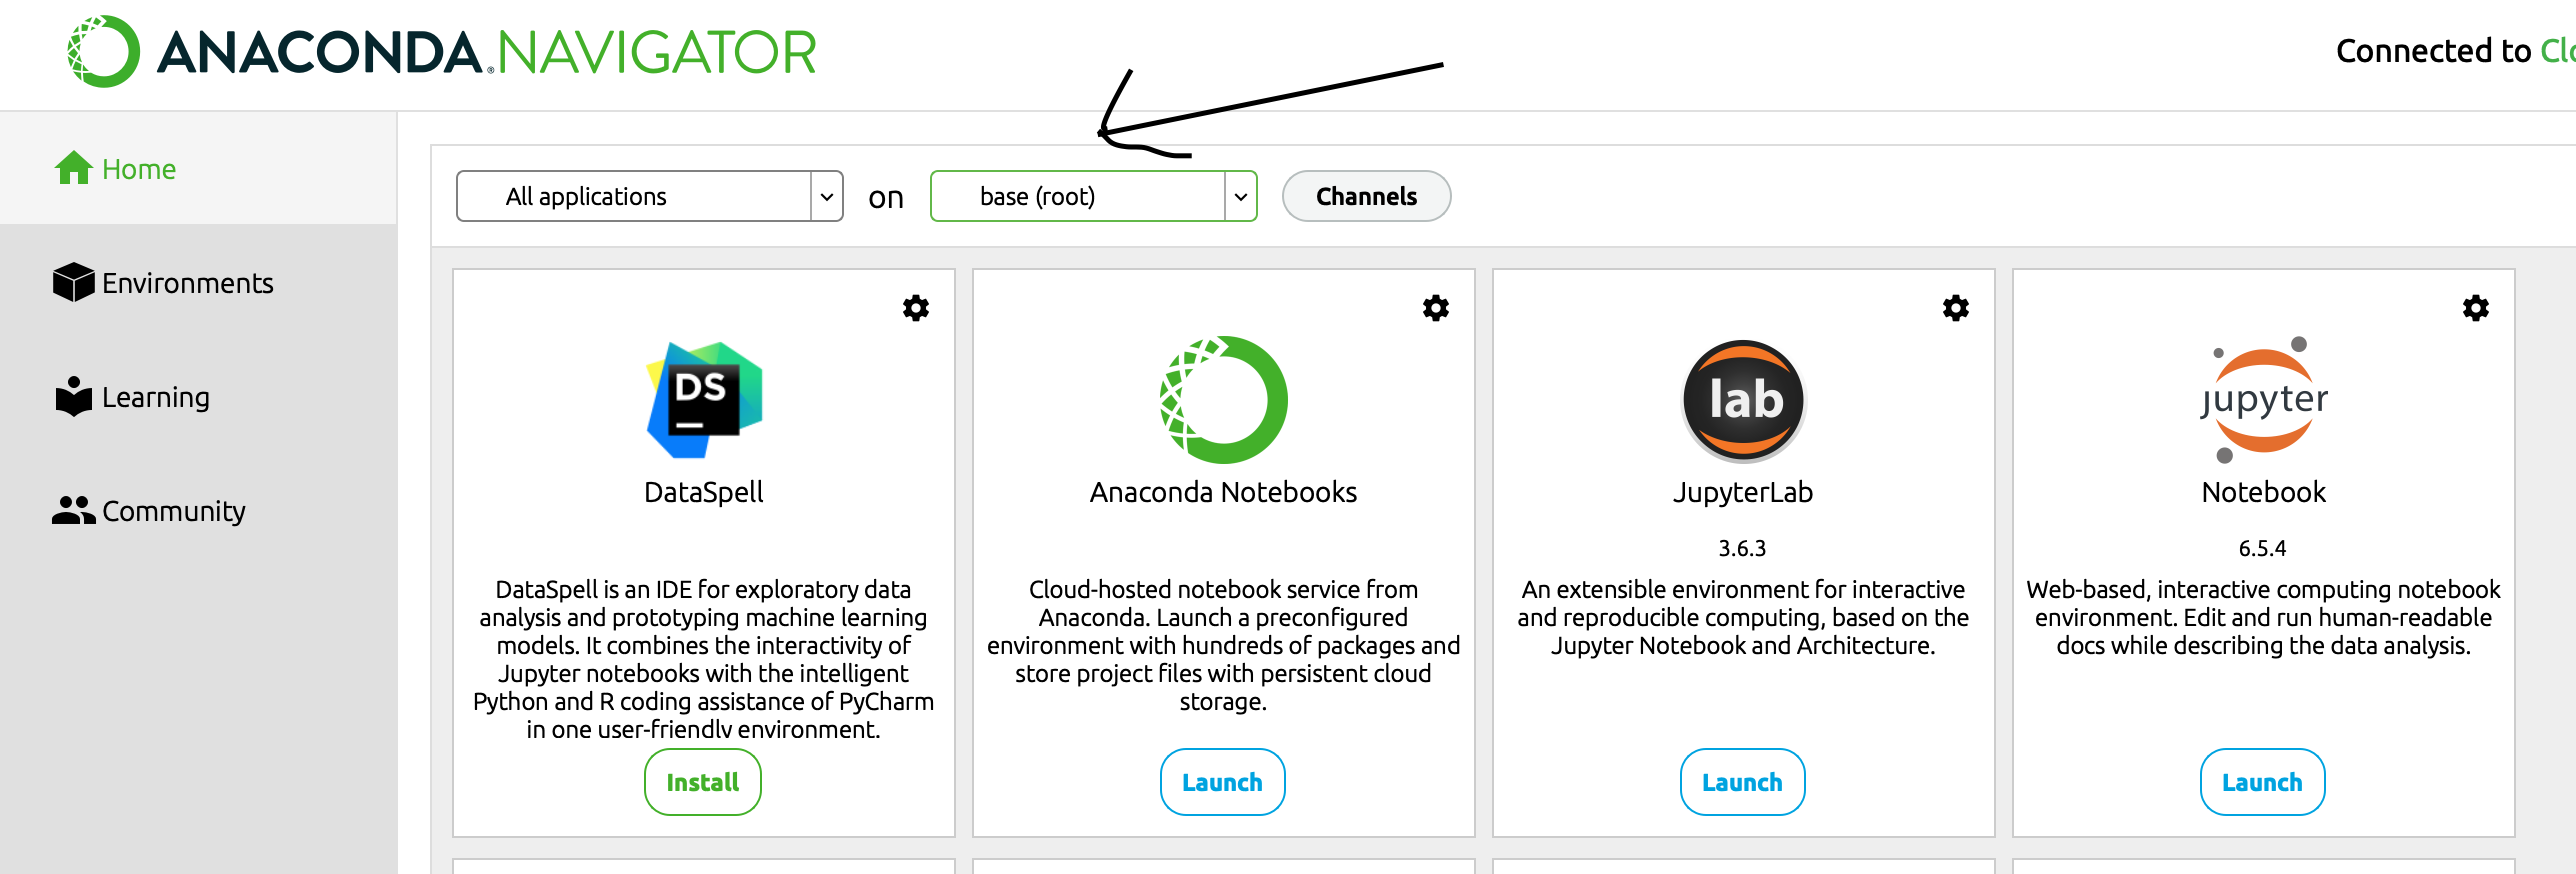

However **if you want to do it all in Jupyter Notebook, skip to Section 2.**

i. Open Terminal/Anaconda prompt and write

`conda create -n my_new_env python=3.11`

my_new_env is your environment name. It could be jku or something else.

ii. Next Activate the environment,

`conda activate my_new_env`


iii. Run,

`conda list -n my_new_env`

This will list the packages installed within this new environment.
Also, check if Jupyter is installed using 

`conda list jupyter`

If Jupyter is not listed, then install Jupyter Notebook for the new environment,

`conda install jupyter`

iv. Install additional packages with Conda or pip within the environment as below (you may have to Google exact names or commands)

```pip install matplotlib seaborn opencv-python``` # It installs these three additonal packages 
in "my_new_env" environment. Remove or add more names as you need.


v. After installing necessary packages, you can select the new environment instead of "base (root)" in Anaconda Navigator GUI and start Jupyter Notebook as displayed below.
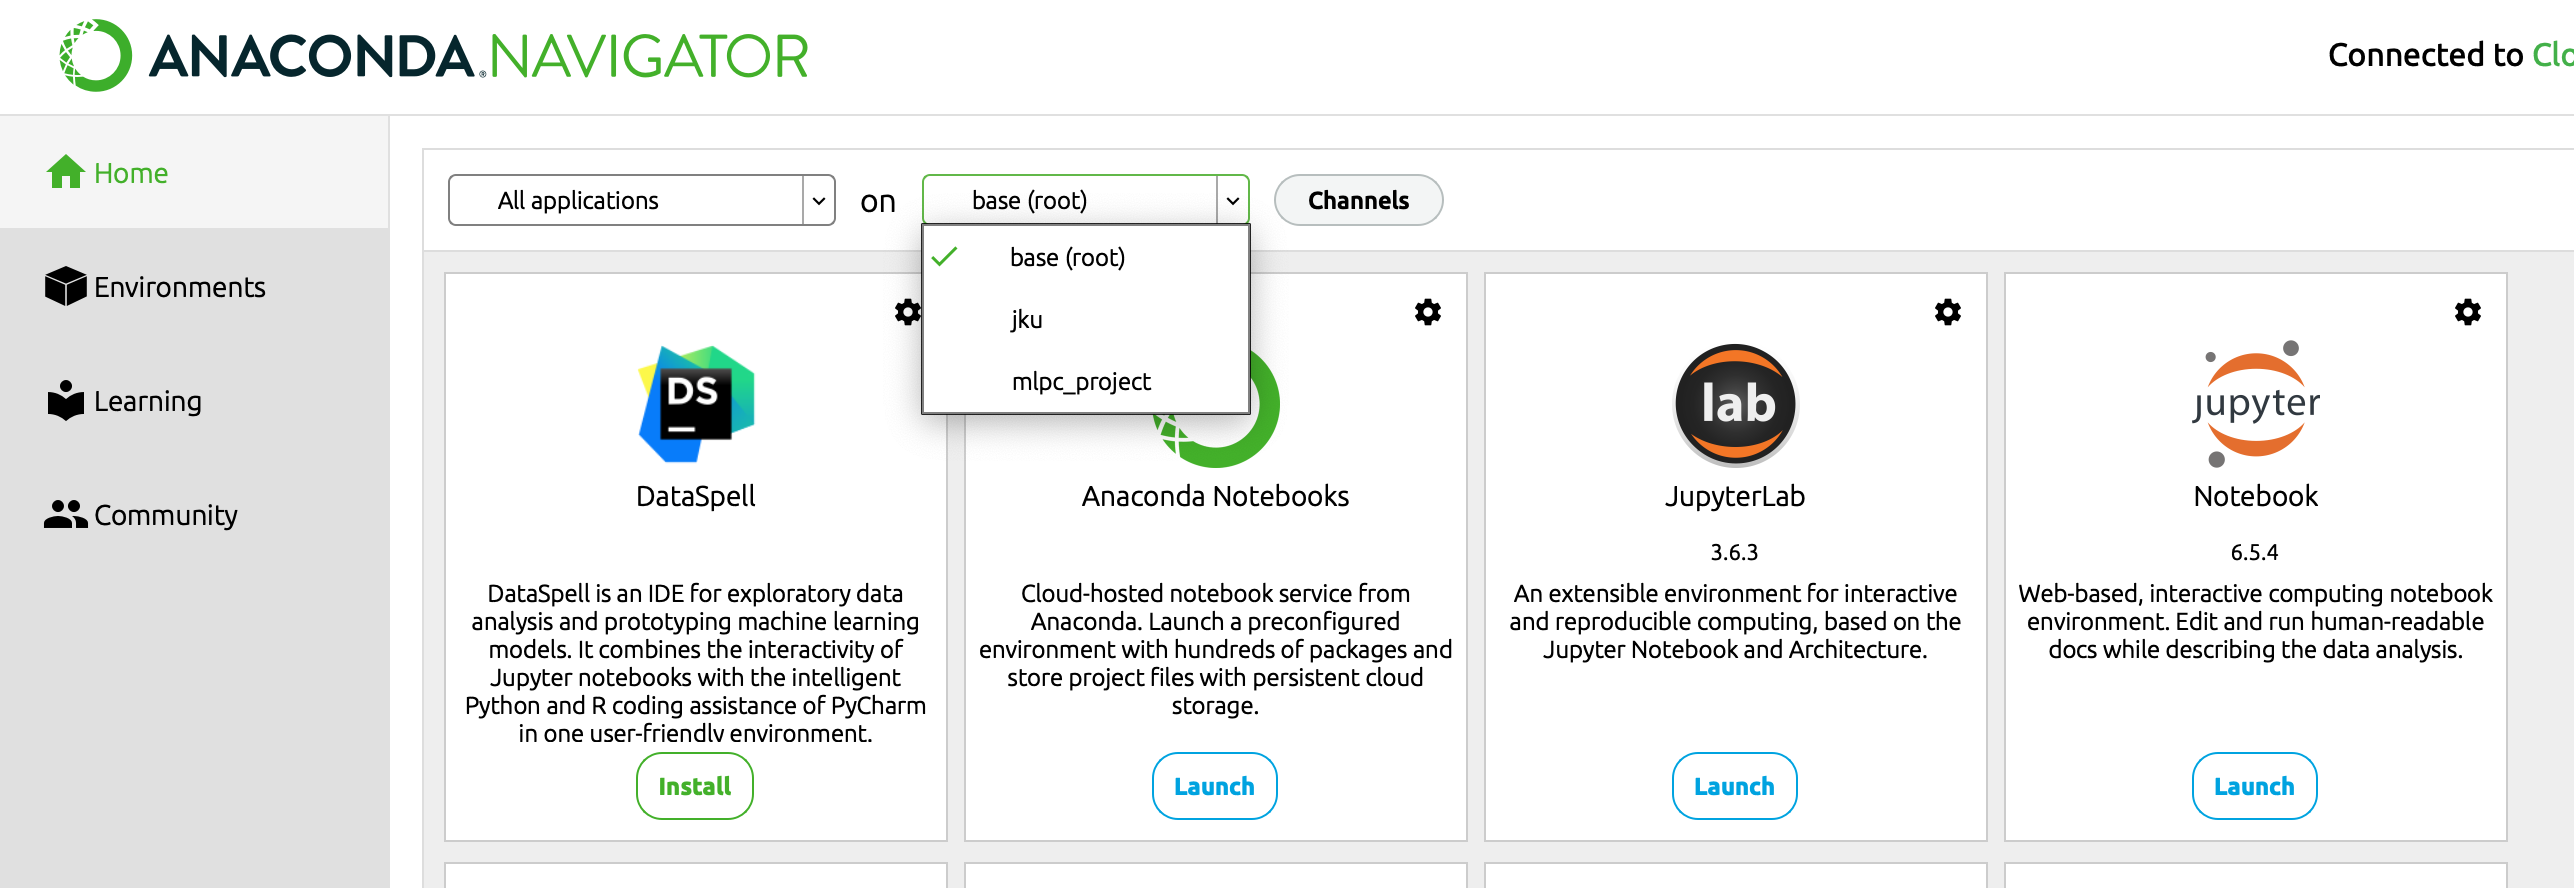

### Additional Commands

```
conda env remove -n my_new_env #To remove the environment

conda deactivate # To deactivate the environment in terminal

conda env list  # To list the environments created/available

```
Additionally,

conda env 

    export    Export a given environment
    update    Update the current environment based on environment file
    config    Configure a conda environment


## 2. Using Jupyter Notebook


In [2]:
!conda create -n jku python=3.11 -y #to create the env JKU; run here with ! and without ! in Terminal/Anaconda prompt.

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2



## Package Plan ##

  environment location: /Users/manugupta/anaconda3/envs/jku

  added / updated specs:
    - python=3.11


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/osx-arm64::bzip2-1.0.8-h80987f9_6 
  ca-certificates    pkgs/main/osx-arm64::ca-certificates-2024.9.24-hca03da5_0 
  libffi             pkgs/main/osx-arm64::libffi-3.4.4-hca03da5_1 
  ncurses            pkgs/main/osx-arm64::ncurses-6.4-h313beb8_0 
  openssl            pkgs/main/osx-arm64::openssl-3.0.15-h80987f9_0 
  pip                pkgs/main/osx-arm64::pip-24.2-py311hca03da5_0 
  python             pkgs/main/osx-arm64::python-3.11.10-h

## Notes

* -n or -name is the flag for name of the environment, -y flag was added because on terminal it will ask y/n permission to install packages
* "!" magic command is needed in Jupyter (full explanation below)

**Env "jku" will be added to Anaconda "base (root)" list in GUI version**

The `!` in Jupyter notebook allows you to run shell commands (commands that you would normally run in a terminal) directly from a notebook cell. It is a "magic" command in Jupyter that tells the notebook to interpret what follows as a shell command, rather than Python code.

Here’s how it works:

### Example Usage of `!` in Jupyter:
1. **Running Shell Commands:**
   ```python
   !ls
   ```
   This will list all files and directories in the current working directory (similar to running `ls` in a terminal).

2. **Installing Packages:**
   You can use the `!` to install packages via `pip` or `conda` directly in the notebook:
   ```python
   !pip install numpy
   ```

3. **Checking Python Version:**
   ```python
   !python --version
   ```

This is useful for quickly integrating shell commands into a Jupyter workflow, which is primarily focused on Python, but might need to interact with the operating system.

### Why the `!` is Needed:
In Jupyter, Python code is the default mode. So when you want to run shell commands, you need to signal to Jupyter that it should not treat the code as Python, but instead send it to the system shell for execution. The `!` symbol is a way to do that.

For example, without `!`, typing `ls` in a Jupyter cell would result in a `NameError` because Python would try to interpret `ls` as a Python function or variable, which doesn’t exist. By using `!ls`, Jupyter knows to run this command in the shell.

However, **this has limitations when trying to activate environments** or run other interactive commands because each `!` command runs in its own subprocess and doesn't persist the state (like an activated environment) between cells.


Note: **Now close this Notebook, open a new Jupyter notebook with environment JKU for example, as displayed in the image below.**
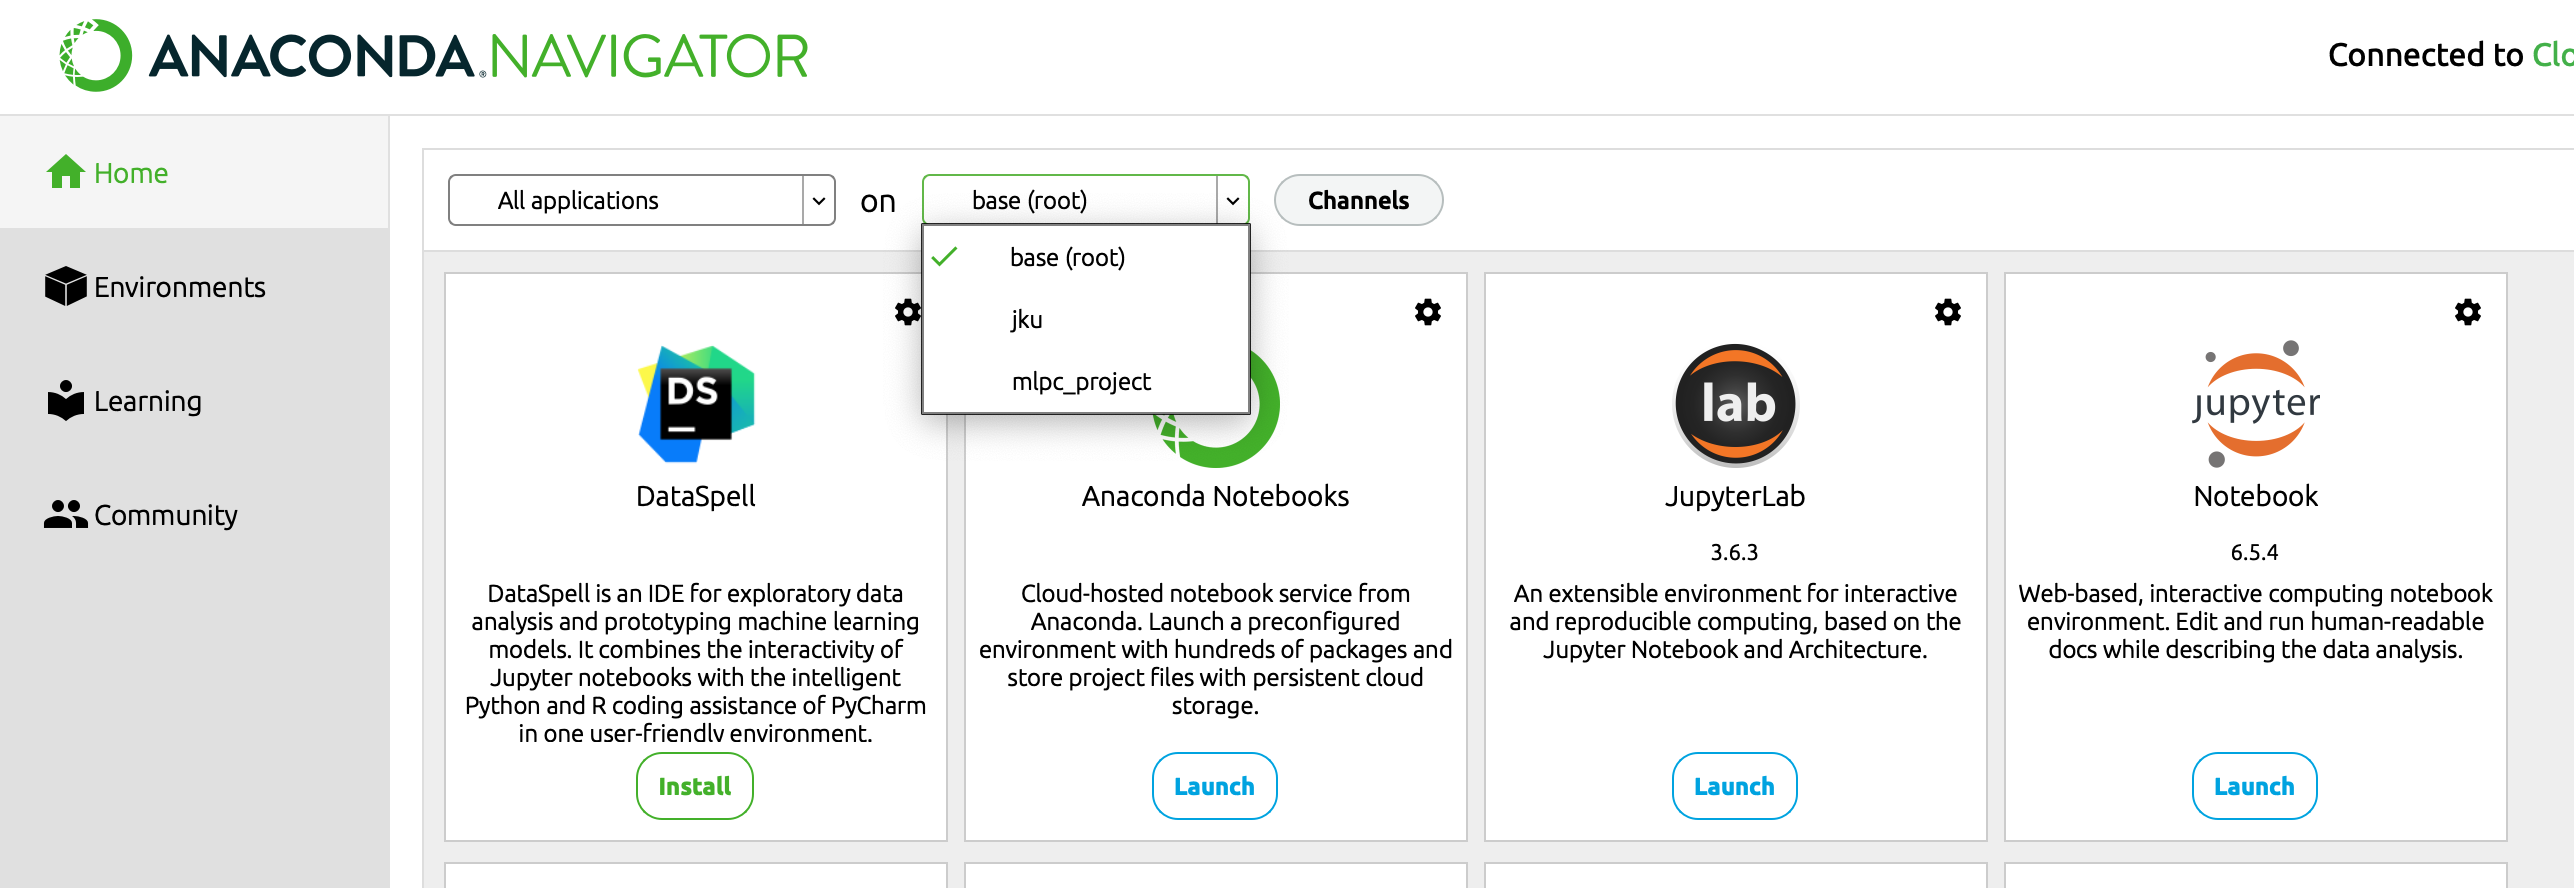

***Or if you still want to try:***

In [6]:
!conda activate jku # This is for Anaconda prompt or terminal but not here. List of conda arguments below

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'env', 'token', 'pack', 'server', 'repo', 'verify')

Note: you may need to restart the kernel to use updated packages.


**The error** here occurs because the `activate` command doesn't work directly in a Jupyter Notebook using the `!` magic command. Conda commands like `activate` modify the environment of the shell they run in, but that doesn't apply when using Jupyter's magic commands like `!` because each command runs in its own shell subprocess. 

To address this, instead of using `!conda activate`, you can manage environments through the Jupyter notebook in two ways:


**NOTE: None of these methods to activate the environment worked for me, so I restarted the Jupyter Notebook afer selecting the new environment.**

#### Option 1: Using the `run` command
You can use `conda run` to execute commands in a specific environment. For example:

```bash
!conda run -n myenv python --version
```

This runs Python inside the `myenv` environment and prints the version. However, this doesn't fully "activate" the environment in the same sense as doing so in a terminal.

#### Option 2: Using `ipykernel` to Create Jupyter Kernels for Conda Environments

If you want to work with different environments in Jupyter, the preferred method is to register the environment as a kernel, as mentioned before. Here are the steps again:

1. **Activate your environment** in the terminal or Anaconda Prompt:

   ```bash
   conda activate myenv
   ```

2. **Install `ipykernel` inside the environment**:

   ```bash
   conda install ipykernel
   ```

3. **Add the environment as a Jupyter kernel**:

   ```bash
   python -m ipykernel install --user --name myenv --display-name "Python (myenv)"
   ```

4. **Restart Jupyter Notebook**. You should now see the new environment under the Kernel (base) menu in Jupyter, allowing you to use the environment without needing to run `conda activate` inside the notebook.

Commands:
```
!conda install -n jku ipykernel -y

!conda run -n jku python -m ipykernel install --user --name jku --display-name "Python (jku)"

!jupyter kernelspec uninstall jku -y  # Uninstall kernelspec added by ipykernel 
```


This way, you can directly select the environment as a Jupyter kernel rather than attempting to activate it within a notebook cell.

In [1]:
!conda run -n jku python --version # This is for Jupyter notebook


EnvironmentLocationNotFound: Not a conda environment: /Users/manugupta/anaconda3/envs/jku



In [3]:
#Or
!conda run -n jku

### After Restarting the notebook with new environment (if above methods did not work for you as well)

In [4]:
!conda info --envs


# conda environments:
#
base                  *  /Users/manugupta/anaconda3
jku                      /Users/manugupta/anaconda3/envs/jku
mlpc_project             /Users/manugupta/anaconda3/envs/mlpc_project



* Asterisk (*) indicates the current environment

In [4]:
!which python  # or "!where python" on Windows
# Checks the location of env, i.e current environment


/Users/manugupta/anaconda3/bin/python


In [5]:
# Or you can also use:

import sys
print(sys.executable)


/Users/manugupta/anaconda3/bin/python


In [18]:
!conda list -n jku # Lists the packages install in "jku" environment

# packages in environment at /Users/manugupta/anaconda3/envs/jku:
#
# Name                    Version                   Build  Channel
bzip2                     1.0.8                h80987f9_6  
ca-certificates           2024.9.24            hca03da5_0  
libffi                    3.4.4                hca03da5_1  
ncurses                   6.4                  h313beb8_0  
openssl                   3.0.15               h80987f9_0  
pip                       24.2            py311hca03da5_0  
python                    3.11.10              hb885b13_0  
readline                  8.2                  h1a28f6b_0  
setuptools                75.1.0          py311hca03da5_0  
sqlite                    3.45.3               h80987f9_0  
tk                        8.6.14               h6ba3021_0  
tzdata                    2024b                h04d1e81_0  
wheel                     0.44.0          py311hca03da5_0  
xz                        5.4.6                h80987f9_1  
zlib                     

**Note:** The environments are typically stored at /Users/manugupta/anaconda3/envs (this path may vary on your system). You can also access these environments in PyCharm by navigating to Settings, selecting Project: [your project name] > Python Interpreter, and choosing Conda Environment. This will display all available Conda environments, including "jku".

In [16]:
!pip install matplotlib seaborn opencv-python # In Anaconda prompt, it installs these additonal packages 
#in "jku" environment

In [1]:
conda env #env commands

usage: conda-env [-h] command ...

positional arguments:
  command
    create    Create an environment based on an environment definition file.
              If using an environment.yml file (the default), you can name the
              environment in the first line of the file with 'name: envname'
              or you can specify the environment name in the CLI command using
              the -n/--name argument. The name specified in the CLI will
              override the name specified in the environment.yml file. Unless
              you are in the directory containing the environment definition
              file, use -f to specify the file path of the environment
              definition file you want to use.
    export    Export a given environment
    list      List the Conda environments
    remove    Remove an environment
    update    Update the current environment based on environment file
    config    Configure a conda environment

options:
  -h, --help  Show this help me

In [17]:
conda env list

# conda environments:
#
base                  *  /Users/manugupta/anaconda3
jku                      /Users/manugupta/anaconda3/envs/jku
mlpc_project             /Users/manugupta/anaconda3/envs/mlpc_project


Note: you may need to restart the kernel to use updated packages.


In [3]:
!conda env remove -n jku -y

In [4]:
conda env list

# conda environments:
#
base                  *  /Users/manugupta/anaconda3
mlpc_project             /Users/manugupta/anaconda3/envs/mlpc_project


Note: you may need to restart the kernel to use updated packages.
